In [1]:
import os

In [2]:
import random

In [3]:
import pandas as pd

In [4]:
from scipy.misc import imread

In [5]:
from scipy.misc import imresize

In [6]:
import numpy as np

In [7]:
import keras

C:\Users\Gurudeo\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from keras.models import Sequential


In [10]:
from keras.layers import Dense, Flatten, InputLayer

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.metrics import accuracy_score

In [13]:
root_dir=os.path.abspath('.')

In [14]:
data_dir='C:/Users/Gurudeo/Desktop/Personal/Age Detection/'

In [15]:
data=pd.read_csv(os.path.join(data_dir, 'data.csv'))

In [16]:
X=data['ID']

In [17]:
Y=data['Class']

In [21]:
msk = np.random.rand(len(data)) < 0.8

In [23]:
train = data[msk]
test = data[~msk]

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


MIDDLE


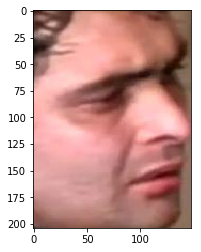

In [28]:
    i = random.choice(train.index)
    img_name = train.ID[i]
    img = imread(os.path.join(data_dir, 'Train', img_name))
    plt.imshow(img)
    print(train.Class[i])



In [29]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Data', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [30]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Data', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [15]:
i=random.choice(data.index)

In [31]:
train_x=train_x / 255.

In [32]:
test_x=test_x / 255.

In [33]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [54]:
input_num_units=(32, 32, 3)
hidden_num_units=1000
output_num_units=3
epochs=20
batch_size=128

In [55]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 3003      
Total params: 3,076,003
Trainable params: 3,076,003
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
gmodel=model.fit(train_x, train_y,validation_split=0.33, batch_size=batch_size,epochs=epochs,verbose=1)

Train on 10693 samples, validate on 5267 samples
Epoch 1/20
10693/10693 [==============================] - 13s 1ms/step - loss: 0.7461 - acc: 0.6652 - val_loss: 0.7265 - val_acc: 0.6767
Epoch 2/20
10693/10693 [==============================] - 9s 838us/step - loss: 0.7473 - acc: 0.6653 - val_loss: 0.8078 - val_acc: 0.6136
Epoch 3/20
10693/10693 [==============================] - 9s 838us/step - loss: 0.7511 - acc: 0.6638 - val_loss: 0.7242 - val_acc: 0.6814
Epoch 4/20
10693/10693 [==============================] - 9s 838us/step - loss: 0.7346 - acc: 0.6788 - val_loss: 0.7584 - val_acc: 0.6512
Epoch 5/20
10693/10693 [==============================] - 9s 844us/step - loss: 0.7398 - acc: 0.6727 - val_loss: 0.7564 - val_acc: 0.6512
Epoch 6/20
10693/10693 [==============================] - 10s 893us/step - loss: 0.7348 - acc: 0.6693 - val_loss: 0.7439 - val_acc: 0.6575
Epoch 7/20
10693/10693 [==============================] - 11s 1ms/step - loss: 0.7329 - acc: 0.6720 - val_loss: 0.7284 - va

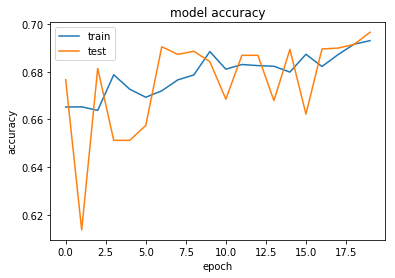

In [68]:
plt.plot(gmodel.history['acc'])
plt.plot(gmodel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

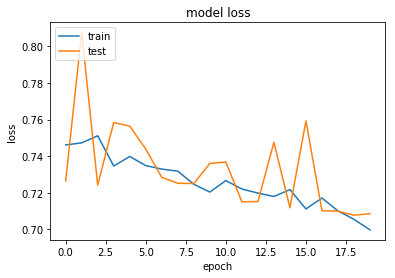

In [69]:
plt.plot(gmodel.history['loss'])
plt.plot(gmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
pred = model.predict_classes(test_x)

In [65]:
pred = lb.inverse_transform(pred)

C:\Users\Gurudeo\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [66]:
orginal=test['Class']

In [70]:
accuracy_score(original,pred)

0.795656656951